In [18]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager

In [171]:
# 플랏 기본 세팅

# 센치미터를 인치로 변환하는 함수
def cm2in(value):
    return value/2.54

def kilo(value):
    return value/1000

def Mega(value):
    return value/1000000

# 폰트 크기 변수 
FS = 8
LEG_FS = FS-1

# 글씨 두께 변수 0.25 간격
LW = np.arange(0, 3.0, 0.25)

# 라인 스타일
DOTTED1 = (1, 1.25)
DASHDOTTED1 = (2.5, 1.25, 1.25, 1.25)
SUBPLOT_NO = list(map(chr, range(97, 123)))


loosely_dotted = (0, (1, 10))
dotted = (0, (1, 1))
densely_dotted = (0, (1, 1))
long_dash_with_offset = 5, (10, 3)
loosely_dashed = (0, (5, 10))
dashed = (0, (5, 5))
densely_dashed = (0, (5, 1))
loosely_dashdotted = (0, (3, 10, 1, 10))
dashdotted = (0, (3, 5, 1, 5))
densely_dashdotted = (0, (3, 1, 1, 1))
dashdotdotted = (0, (3, 5, 1, 5, 1, 5))
loosely_dashdotdotted = (0, (3, 10, 1, 10, 1, 10))
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

def D2K(val): 
    return val + 273.15 
def K2D(val):
    return val - 273.15

In [20]:
# 기본인 폰트, 플랏 선 설정

PLT_RC_PARAMS = {
    "font": {
        "size": 8,
        # "family": "sans-serif",
        "family": "Calibri",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        "dashed_pattern": [0.7, 9],     # only for grid line
        # "dashed_pattern": [3, 1.5],     # for data line 
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "numpoints": 1,         # legend number of markers
        "borderaxespad": 0.4,   # axes 틀로부터 legend 경계까지 거리 
        "handletextpad": 0.3,   # 선과 선이름 사이의 간격 
        "fancybox": False,
        
    },
    "axes": {
        "linewidth": 0.5 
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "ytick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "figure": {
        "dpi": 300
    },
    
    # Other parameters...
}


## CSV

In [21]:
# csv 파일
df_T_node_data = pd.read_csv('../data/df_T.csv', encoding='cp949')
df_T_left_node_data = pd.read_csv('../data/df_T_left.csv', encoding='cp949')
df_T_right_node_data = pd.read_csv('../data/df_T_right.csv', encoding='cp949')

df_q_data = pd.read_csv('../data/df_q.csv')
df_q_in_data = pd.read_csv('../data/df_q_in.csv')
df_q_out_data = pd.read_csv('../data/df_q_out.csv')

df_BC_data = pd.read_csv('../data/BC_data.csv')

df_exergy_c_data = pd.read_csv('../data/df_exergy_c.csv')

df_q_BL_data = pd.read_csv('../data/q_BL data.csv')
df_exergy_c_check = pd.read_csv('../data/df_exergy_c_check.csv')

## Time step

In [5]:
# time step, 시간 축 설정
t = 10
hour_to_sec = 3600
time_list = [t*i/hour_to_sec for i in range(len(df_T_node_data.iloc[:,[0]]))]
duration = len((df_T_node_data.iloc[:,[0]]))*t/hour_to_sec


## Data

In [6]:
T_oa = K2D(df_BC_data.loc[:,["T_oa"]])
T_os = df_T_left_node_data.iloc[:,[0]]
T_2  = df_T_left_node_data.iloc[:,[1]]
T_3 = df_T_node_data.iloc[:,[1]]
T_4= df_T_left_node_data.iloc[:,[2]]
T_5 = df_T_node_data.iloc[:,[2]]
T_6 = df_T_left_node_data.iloc[:,[3]]
T_8 = df_T_left_node_data.iloc[:,[4]] 
T_is = df_T_right_node_data.iloc[:,[4]]

q_0 = df_q_in_data.iloc[:,[0]]
q_2 = df_q_in_data.iloc[:,[1]]
q_3 = df_q_data.iloc[:,[1]]
q_4 = df_q_in_data.iloc[:,[2]]
q_5 = df_q_data.iloc[:,[2]]
q_6 = df_q_in_data.iloc[:,[3]]
q_8 = df_q_in_data.iloc[:,[4]]
q_10 = df_q_out_data.iloc[:,[4]]

q_sky = df_q_BL_data.loc[:,"q_sky"]
q_gnd = df_q_BL_data.loc[:,"q_gnd"]
q_cv = df_q_BL_data.loc[:,"q_cv"]
q_cd = df_q_BL_data.loc[:,"q_cd"]
q_alpha = df_BC_data.loc[:, "q_alpha"]
q_t = q_sky+q_gnd+q_cv+q_alpha
T_left_sun = df_q_BL_data.loc[:, "T_left_sun"]
T_left_sky = df_q_BL_data.loc[:, "T_left_sky"]
T_left_gnd = df_q_BL_data.loc[:, "T_left_gnd"]
T_left_cv = df_q_BL_data.loc[:, "T_left_cv"]
T_left_cd = df_q_BL_data.loc[:, "T_left_cd"]

exergy_c_sun = df_exergy_c_check.loc[:, "exergy_c_sun"]
exergy_c_sky = df_exergy_c_check.loc[:, "exergy_c_sky"]
exergy_c_gnd = df_exergy_c_check.loc[:, "exergy_c_gnd"]
exergy_c_cv = df_exergy_c_check.loc[:, "exergy_c_cv"]

exergy_c_1 = df_exergy_c_data.iloc[:,[0]]
exergy_c_3 = df_exergy_c_data.iloc[:,[1]]
exergy_c_5 = df_exergy_c_data.iloc[:,[2]]
exergy_c_7 = df_exergy_c_data.iloc[:,[3]]
exergy_c_9 = df_exergy_c_data.iloc[:,[4]]

## Temperature Plot

In [7]:
from cProfile import label

def plot(node1, node2, node3, node4, node5, node6, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1.max().max(), node2.max().max(), node3.max().max(), node4.max().max(), node5.max().max(), node6.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1.min().min(), node2.min().min(), node3.min().min(), node4.min().min(), node5.min().min(), node6.min().min())

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1, node2, node3, node4, node5, node6] # 노드 바꾸면 추가해야 됨
    color = ['#000000', '#180f0d', '#7a1514', '#ac2a1a', '#c46d1c','#ffe100',]
    plot_label = plot_label
    line_label = ['--', '-', '-', '-', '-', '-']


    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [10]*nfigs
    ymax = [60]*nfigs
    yint = [10]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [h]"]*nfigs
    ylabel = ["Temperature [°C]"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                label = plot_label[i],
                linestyle = line_label[i],
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=3, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=6, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.6,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/temp.svg', format='svg')

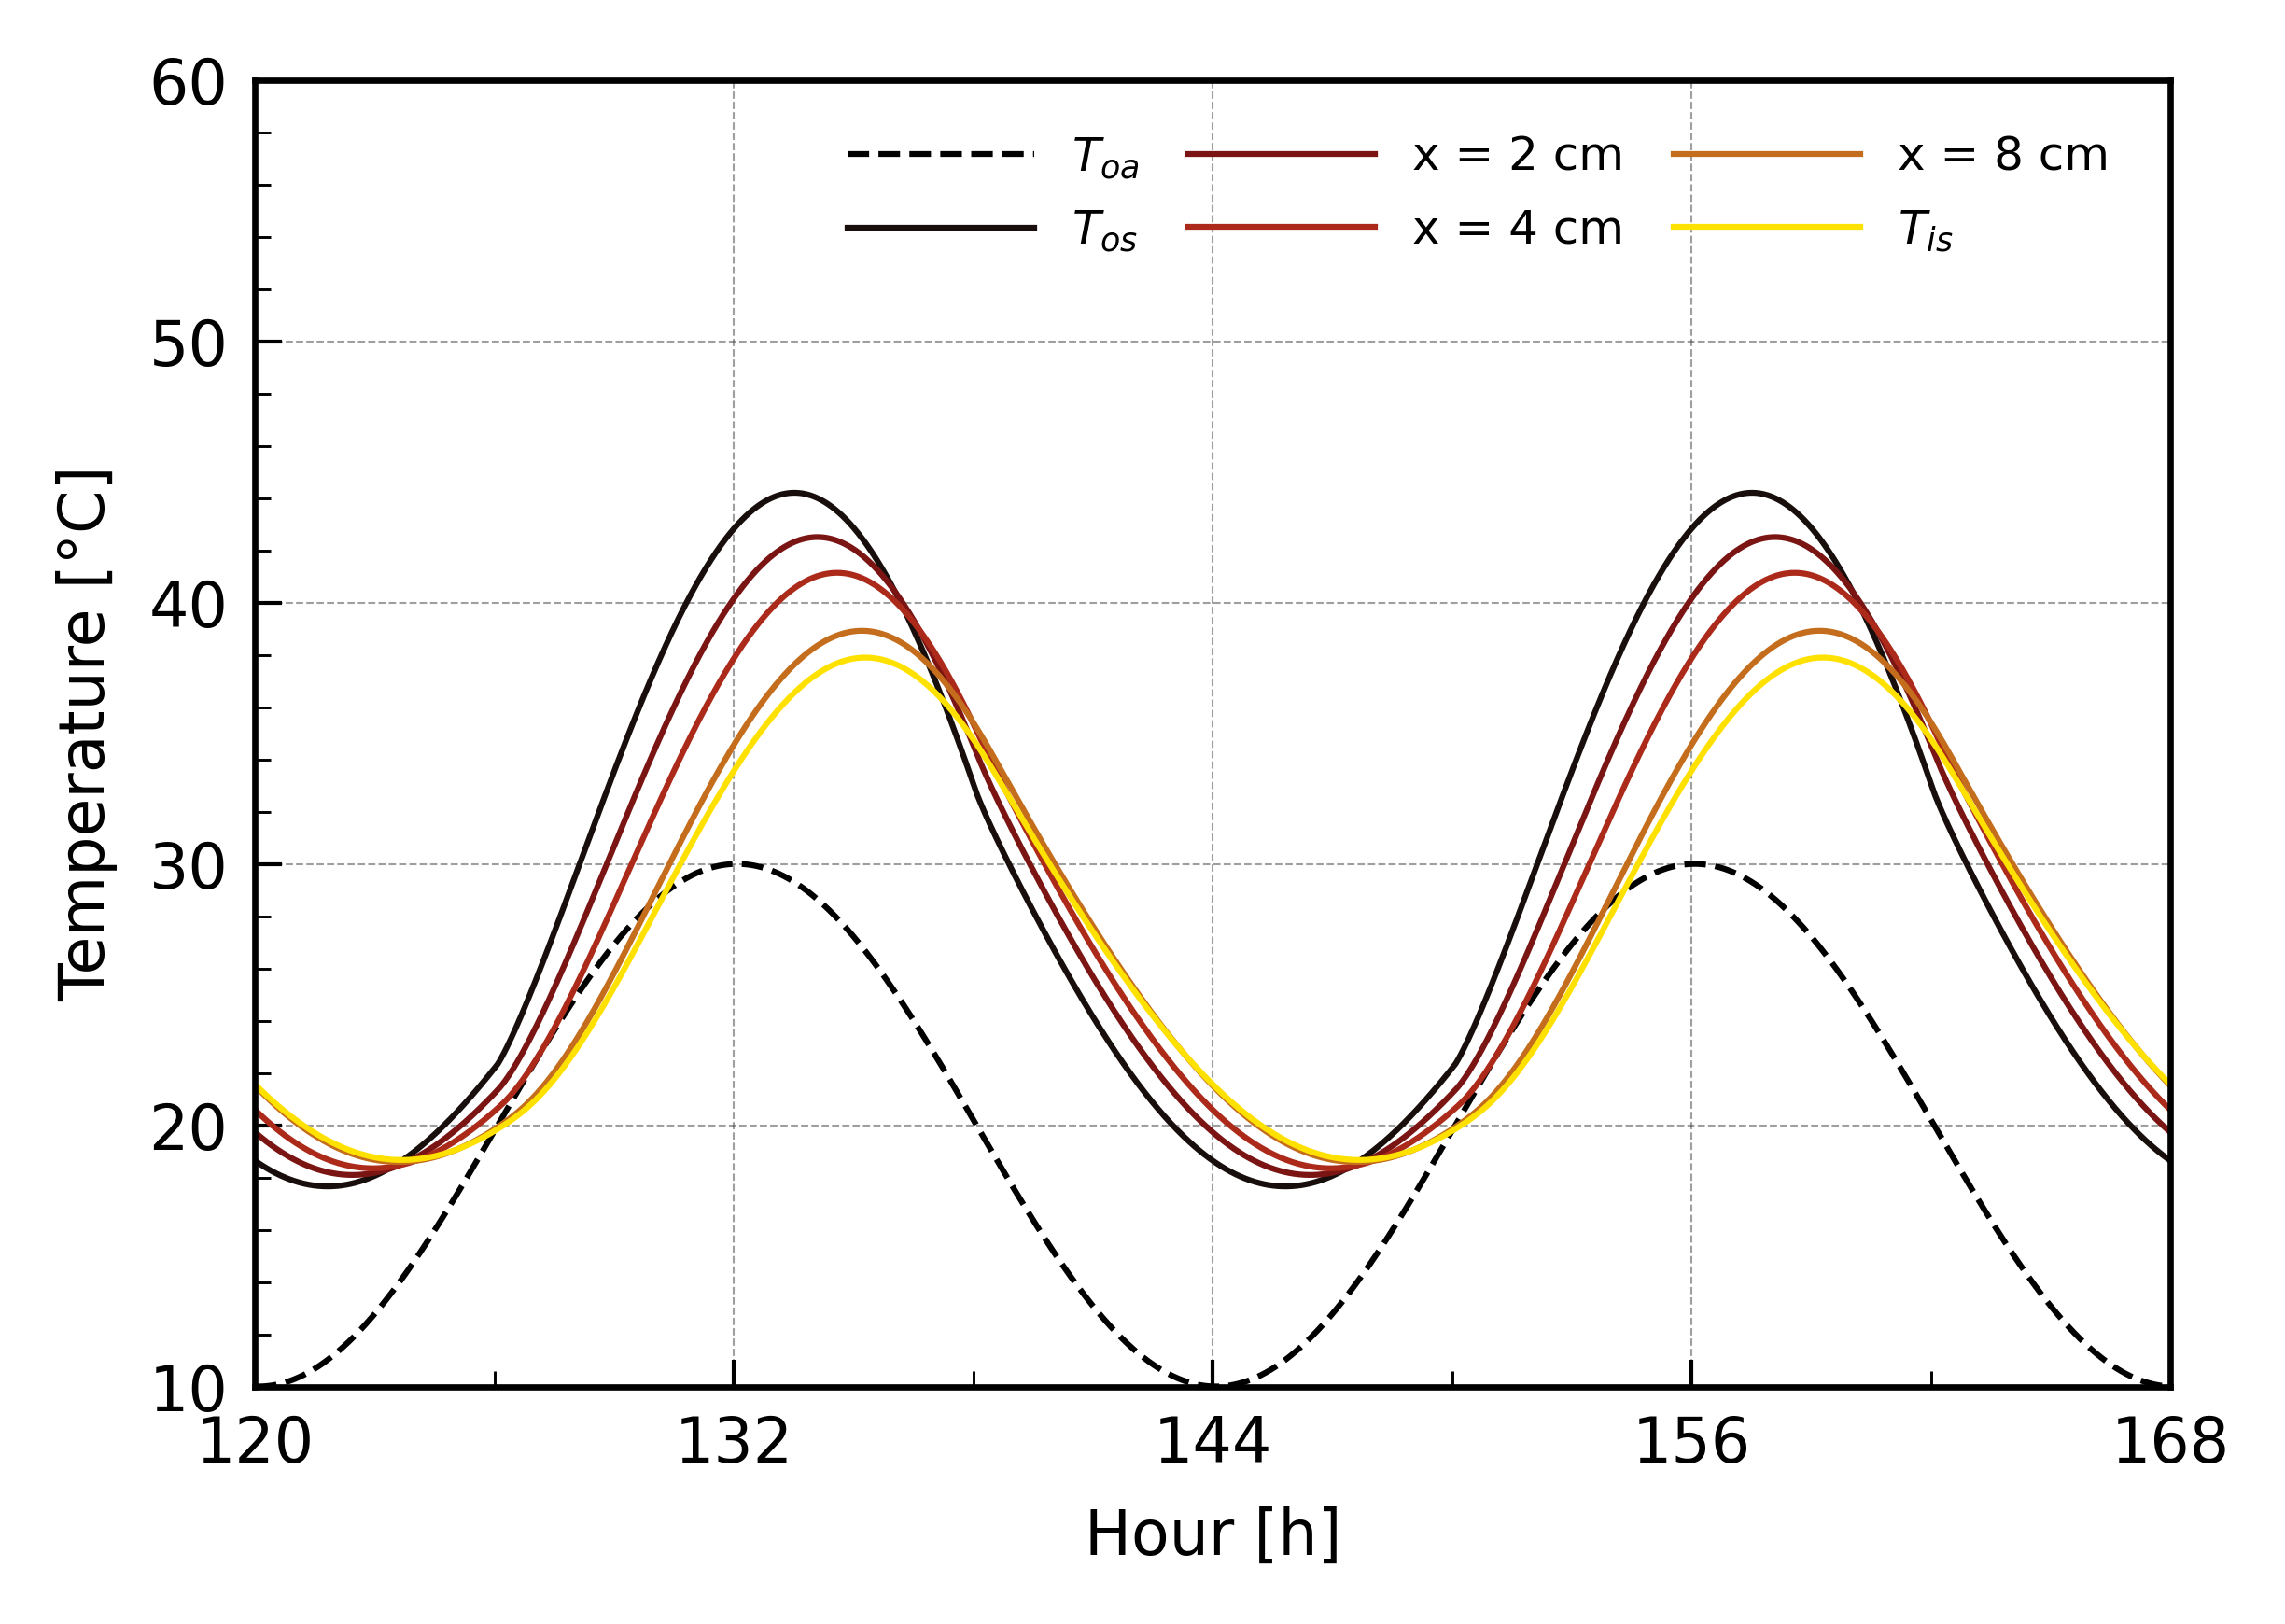

In [8]:
plot(T_oa, T_os, T_2, T_4, T_8, T_is, 6,
     ("${T_{oa}}$", "${T_{os}}$", "x = 2 cm", "x = 4 cm", "x = 8 cm", "${T_{is}}$"))

In [9]:
from cProfile import label

def plot(node1, node2, node3, node4, node5, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1.max().max(), node2.max().max(), node3.max().max(), node4.max().max(), node5.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1.min().min(), node2.min().min(), node3.min().min(), node4.min().min(), node5.min().min())

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1, node2, node3, node4, node5] # 노드 바꾸면 추가해야 됨
    color = ['#180f0d', '#7a1514', '#ac2a1a', '#c46d1c','#ffe100',]
    plot_label = plot_label
    line_label = ['-', '-', '-', '-', '-', '-']


    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs


    ymin = [240]*nfigs
    ymax = [300]*nfigs
    yint = [10]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [s]"]*nfigs
    ylabel = ["Temperature [K]"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                label = plot_label[i],
                linestyle = line_label[i],
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=1, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=6, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.6,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/temp.svg', format='svg')

### 표면 온도 분해

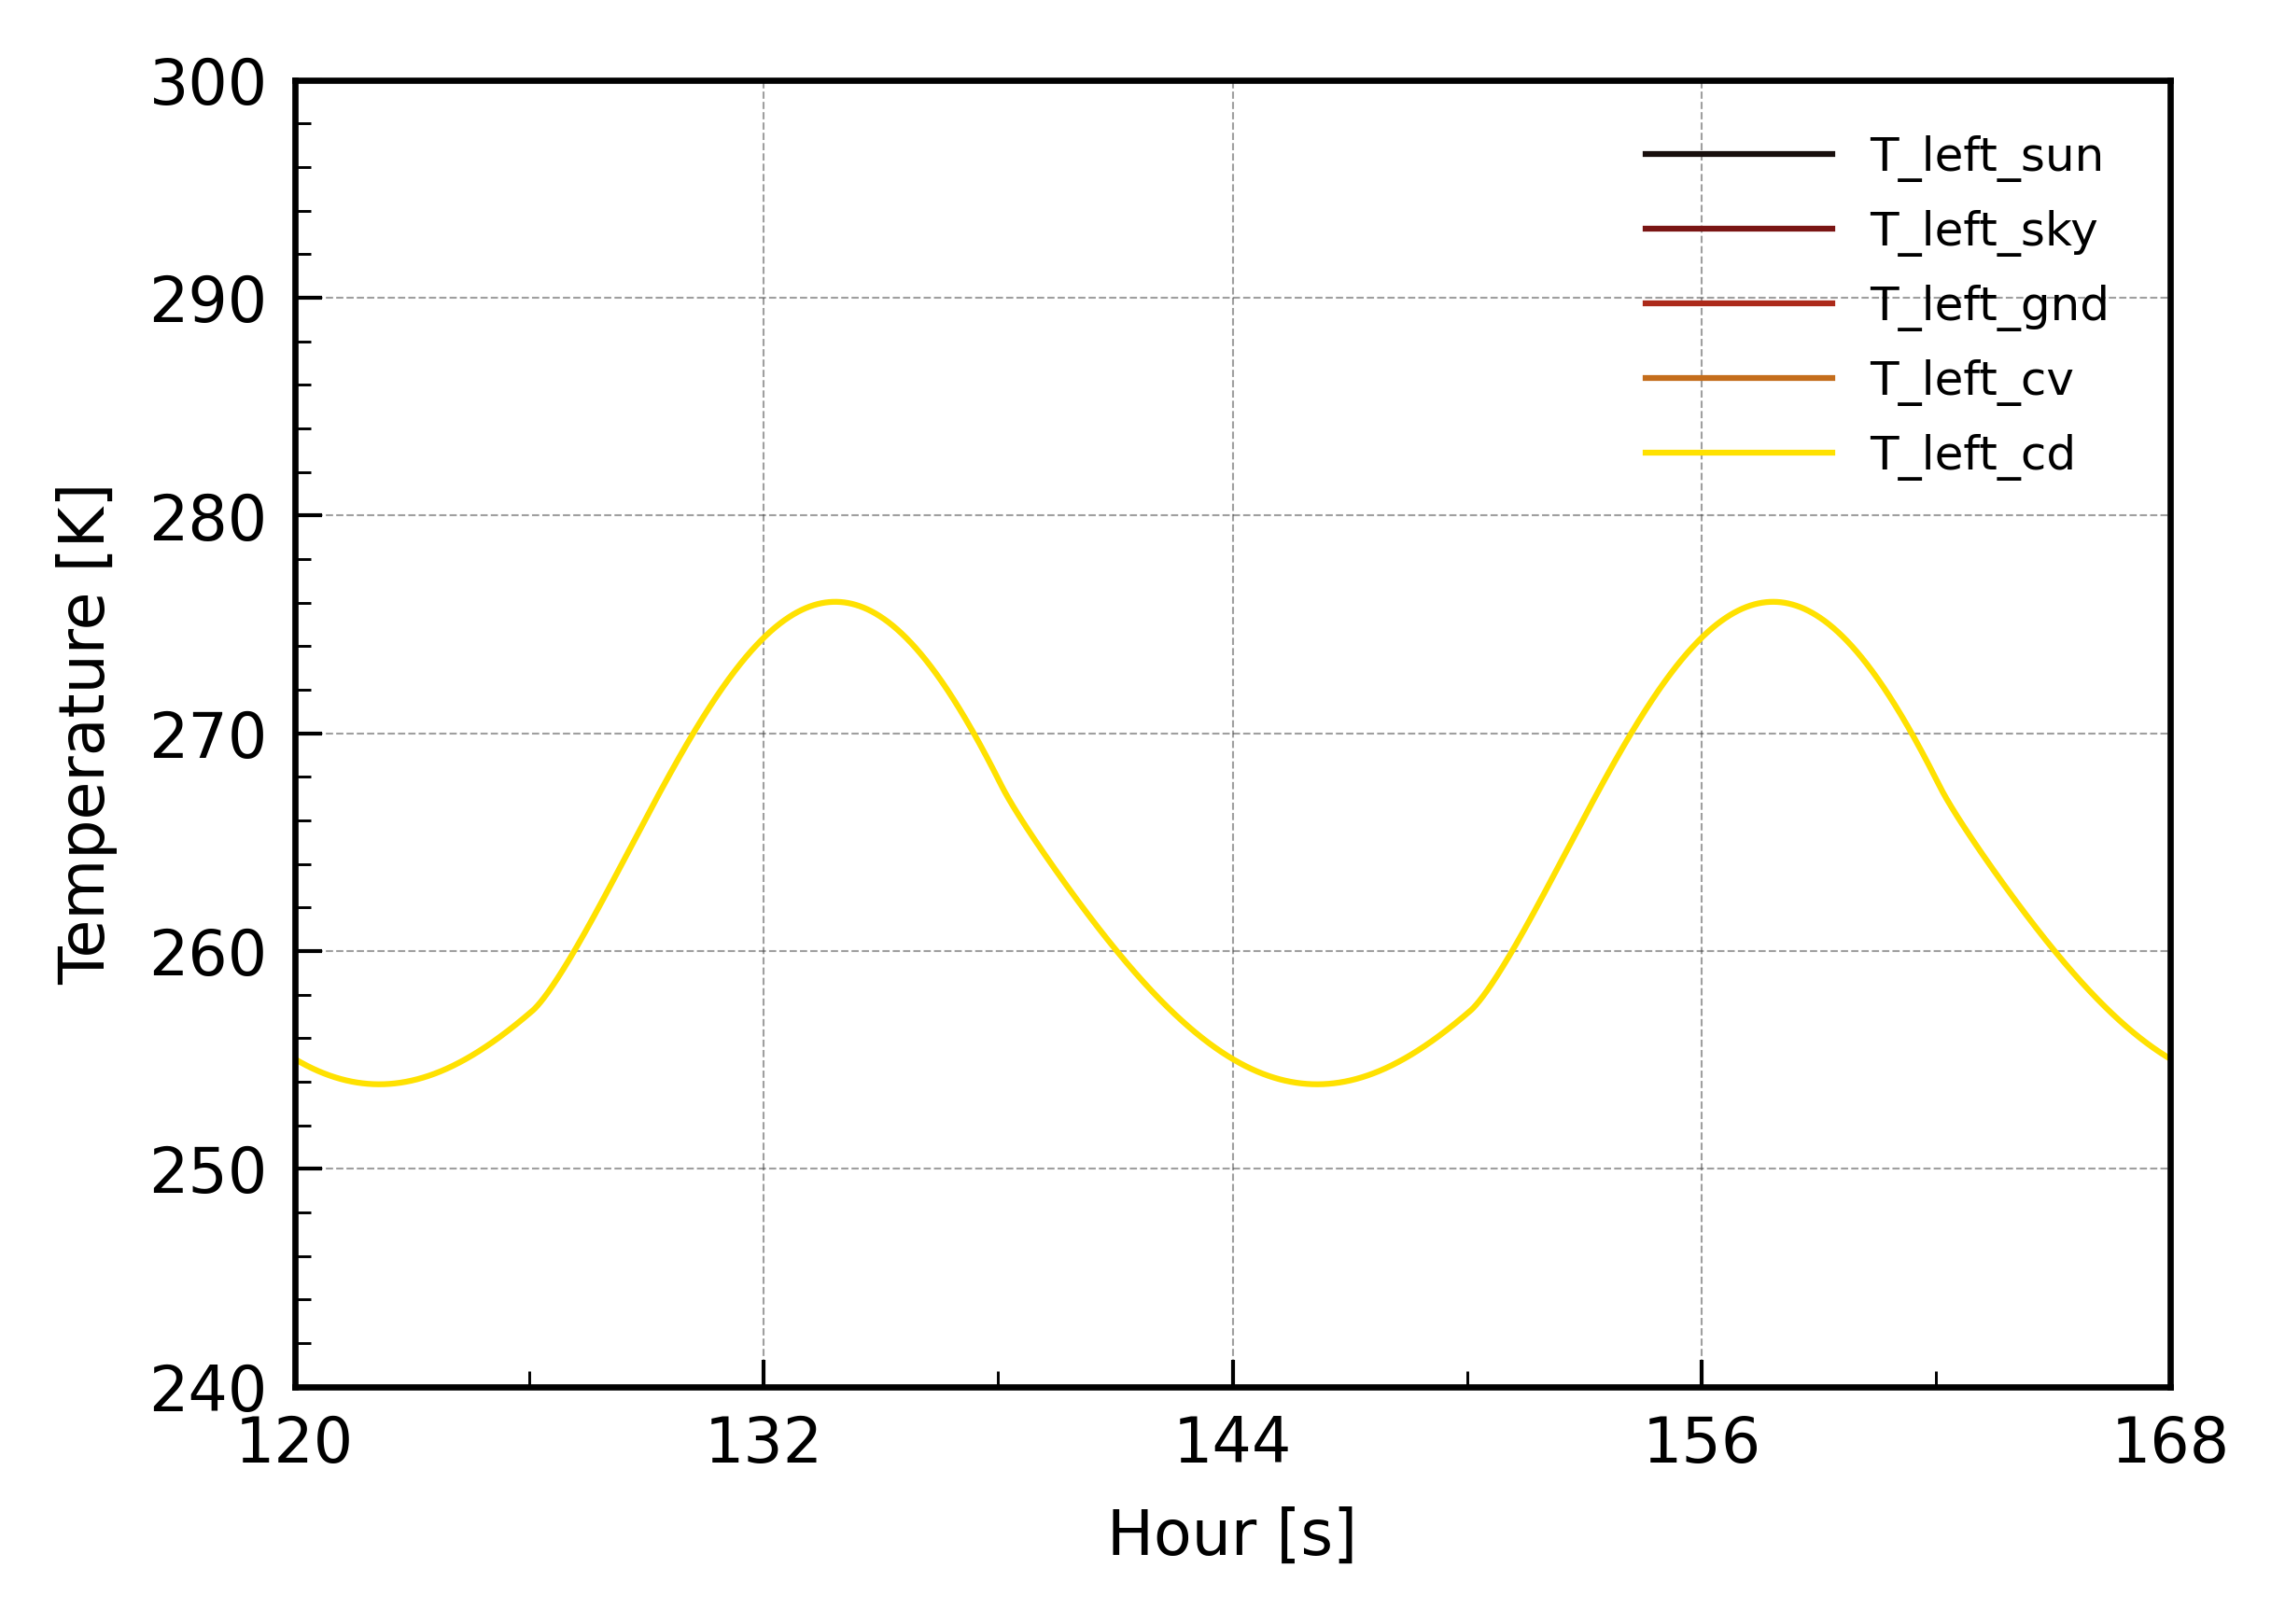

In [10]:
plot(T_left_sun, T_left_sky, T_left_gnd, T_left_cv, T_left_cd, 5,
     ("T_left_sun", "T_left_sky", "T_left_gnd", "T_left_cv", "T_left_cd"))

## Heat flux Plot

In [11]:
from cProfile import label

def plot(node1, node2, node3, node4, node5, node6, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1.max().max(), node2.max().max(), node3.max().max(), node4.max().max(), node5.max().max(), node6.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1.min().min(), node2.min().min(), node3.min().min(), node4.min().min(), node5.min().min(), node6.min().min())

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1, node2, node3, node4, node5, node6] # 노드 바꾸면 추가해야 됨
    color = ['#000000', '#180f0d', '#7a1514', '#ac2a1a', '#c46d1c','#ffe100',]
    plot_label = plot_label
    line_label = ['-', '-', '-', '-', '-', '-']


    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [-300]*nfigs
    ymax = [300]*nfigs
    yint = [100]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [h]"]*nfigs
    ylabel = ["Heat flux $~\mathrm{[W/m^2]}$"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                label = plot_label[i],
                linestyle = line_label[i],
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='lower right', ncol=3, bbox_to_anchor=(1, 0), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=6, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.6,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/Heatflux.svg', format='svg')

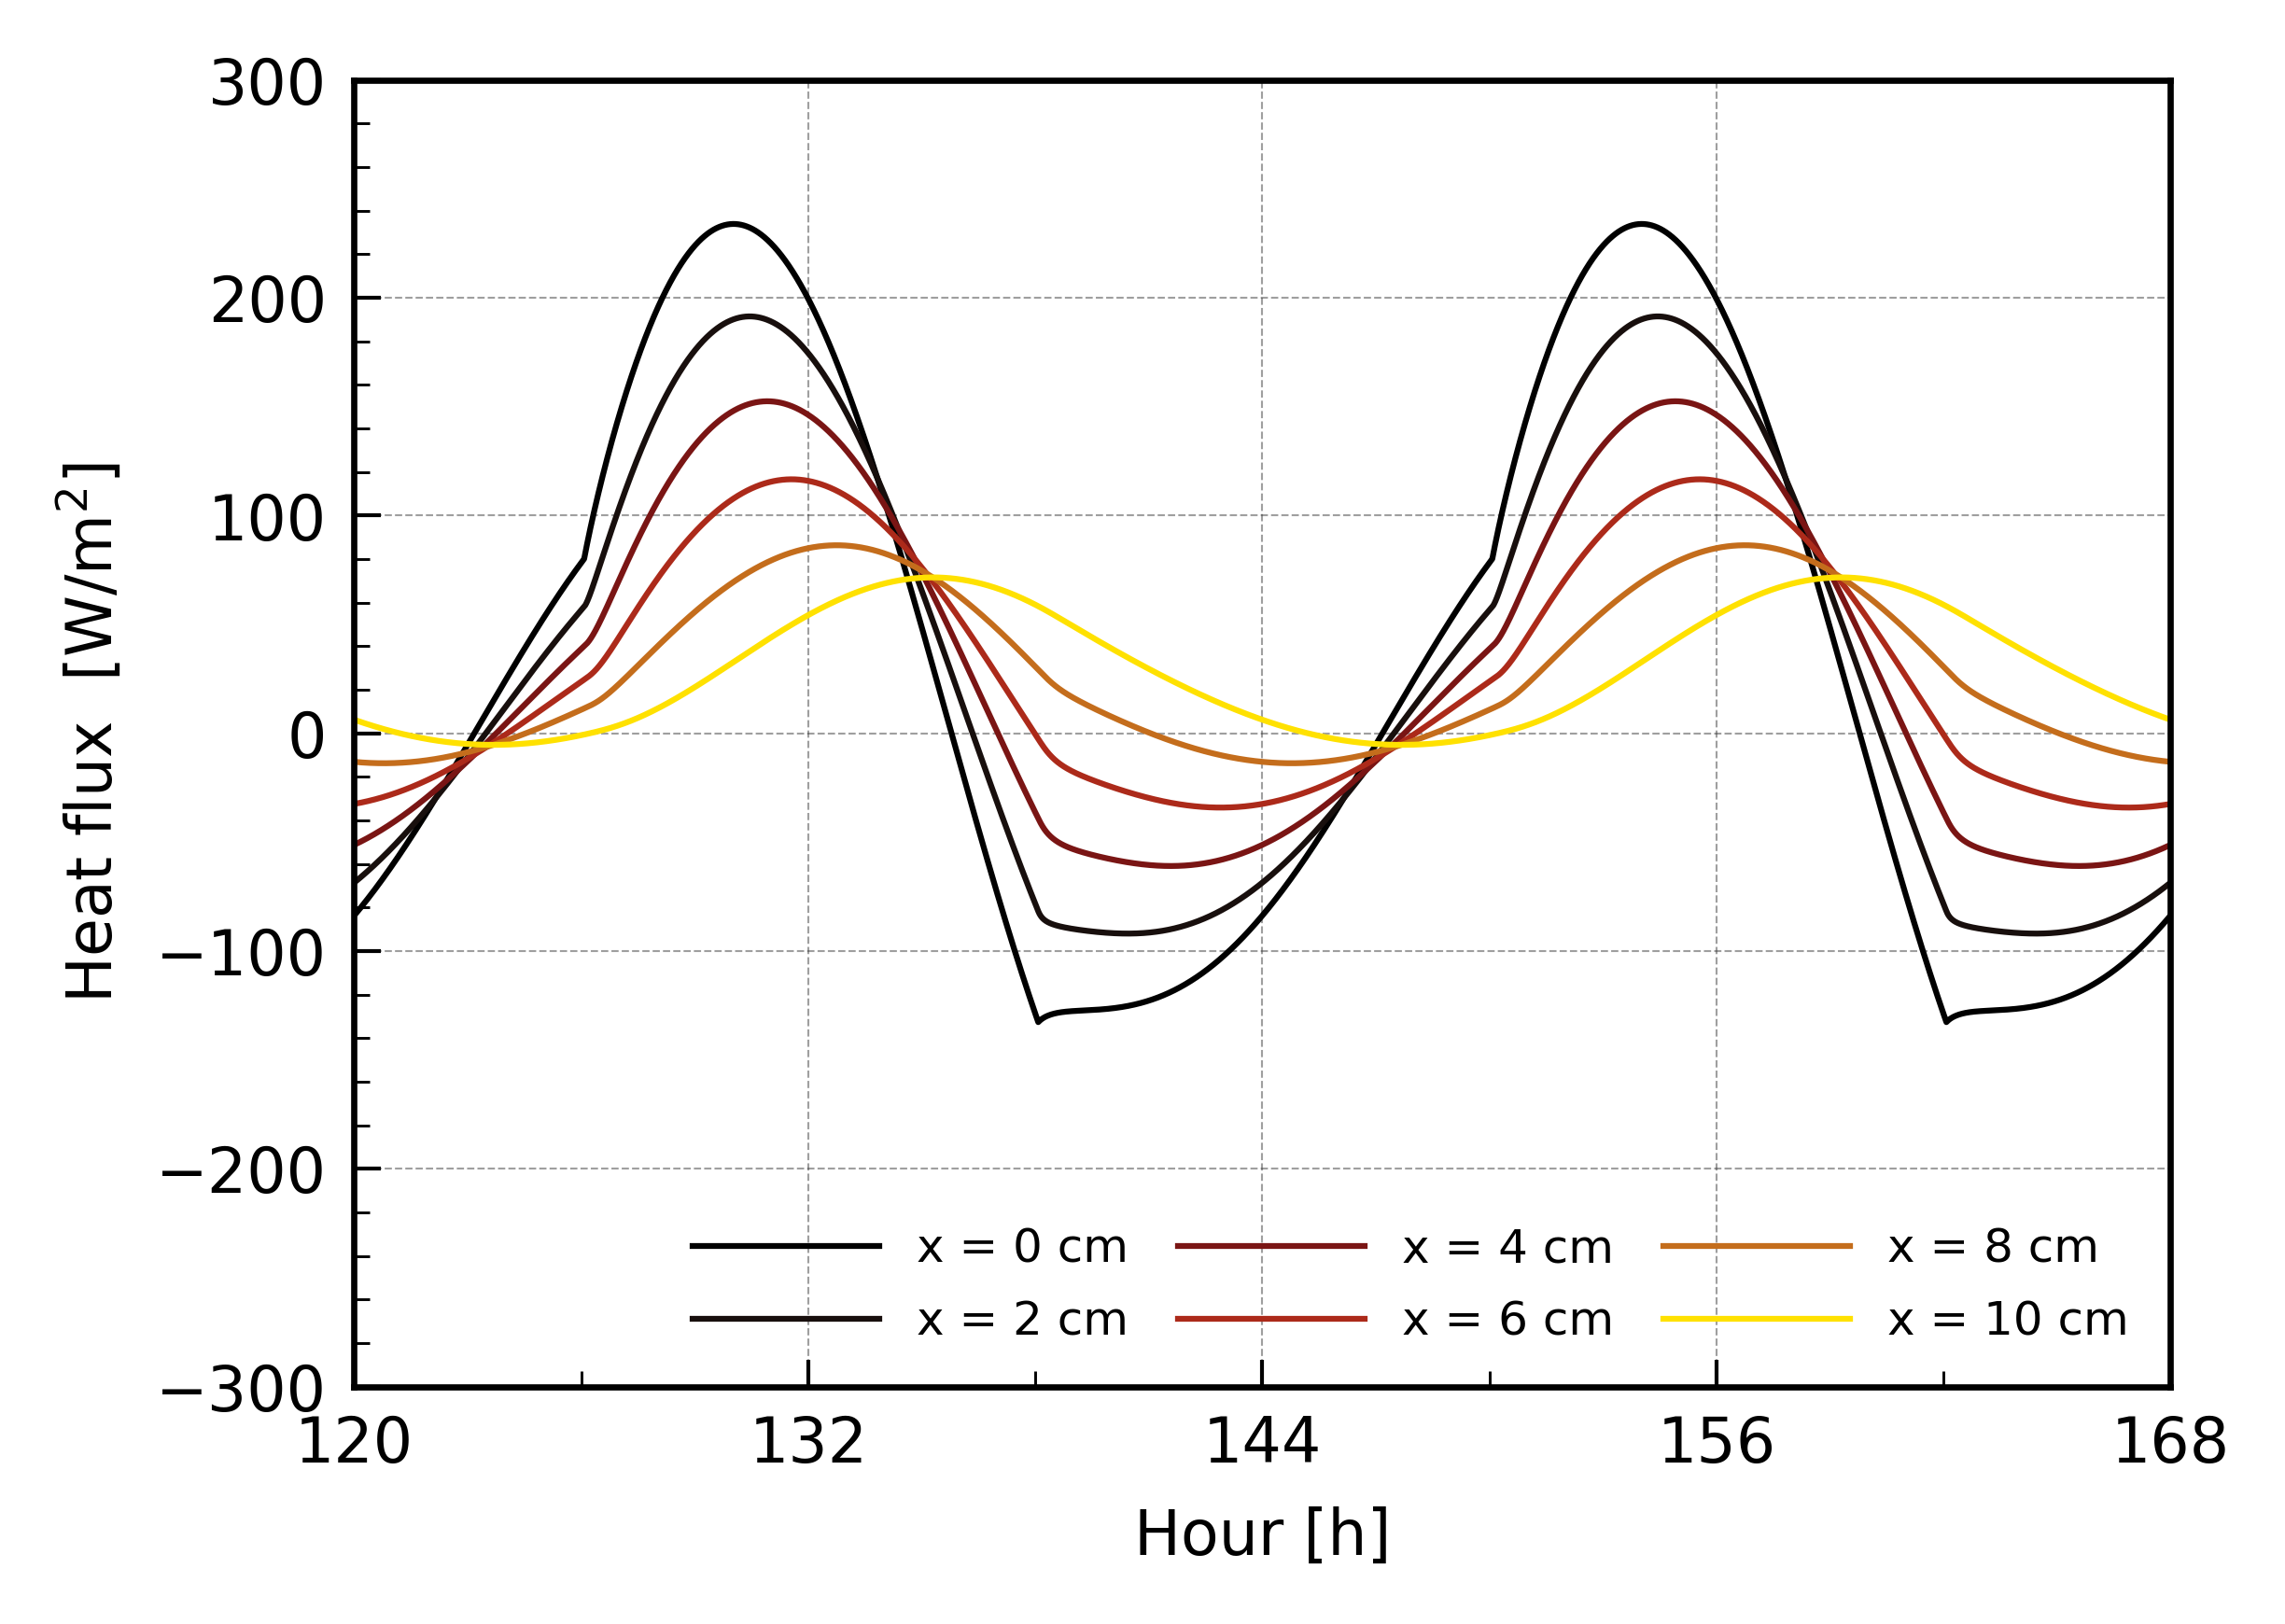

In [12]:
plot(q_0, q_2, q_4, q_6, q_8, q_10, 6,
     ("x = 0 cm", "x = 2 cm", "x = 4 cm", "x = 6 cm", "x = 8 cm", "x = 10 cm"))

### BL 열류 분해

In [13]:
from cProfile import label

def plot(node1, node2, node3, node4, node5, node6, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1.max().max(), node2.max().max(), node3.max().max(), node4.max().max(), node5.max().max(), node6.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1.min().min(), node2.min().min(), node3.min().min(), node4.min().min(), node5.min().min(), node6.min().min())

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1, node2, node3, node4, node5, node6] # 노드 바꾸면 추가해야 됨
    color = ['#000000', '#180f0d', '#ac2a1a', '#c46d1c','#ffe100', '#ffe100']
    plot_label = plot_label
    line_label = ['--', '-', '-', '-', '-', ':']


    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [-300]*nfigs
    ymax = [600]*nfigs
    yint = [100]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [s]"]*nfigs
    ylabel = ["Heat flux $~\mathrm{[W/m^2]}$"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                label = plot_label[i],
                linestyle = line_label[i],
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=1, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=6, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.6,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/Heatflux.svg', format='svg')

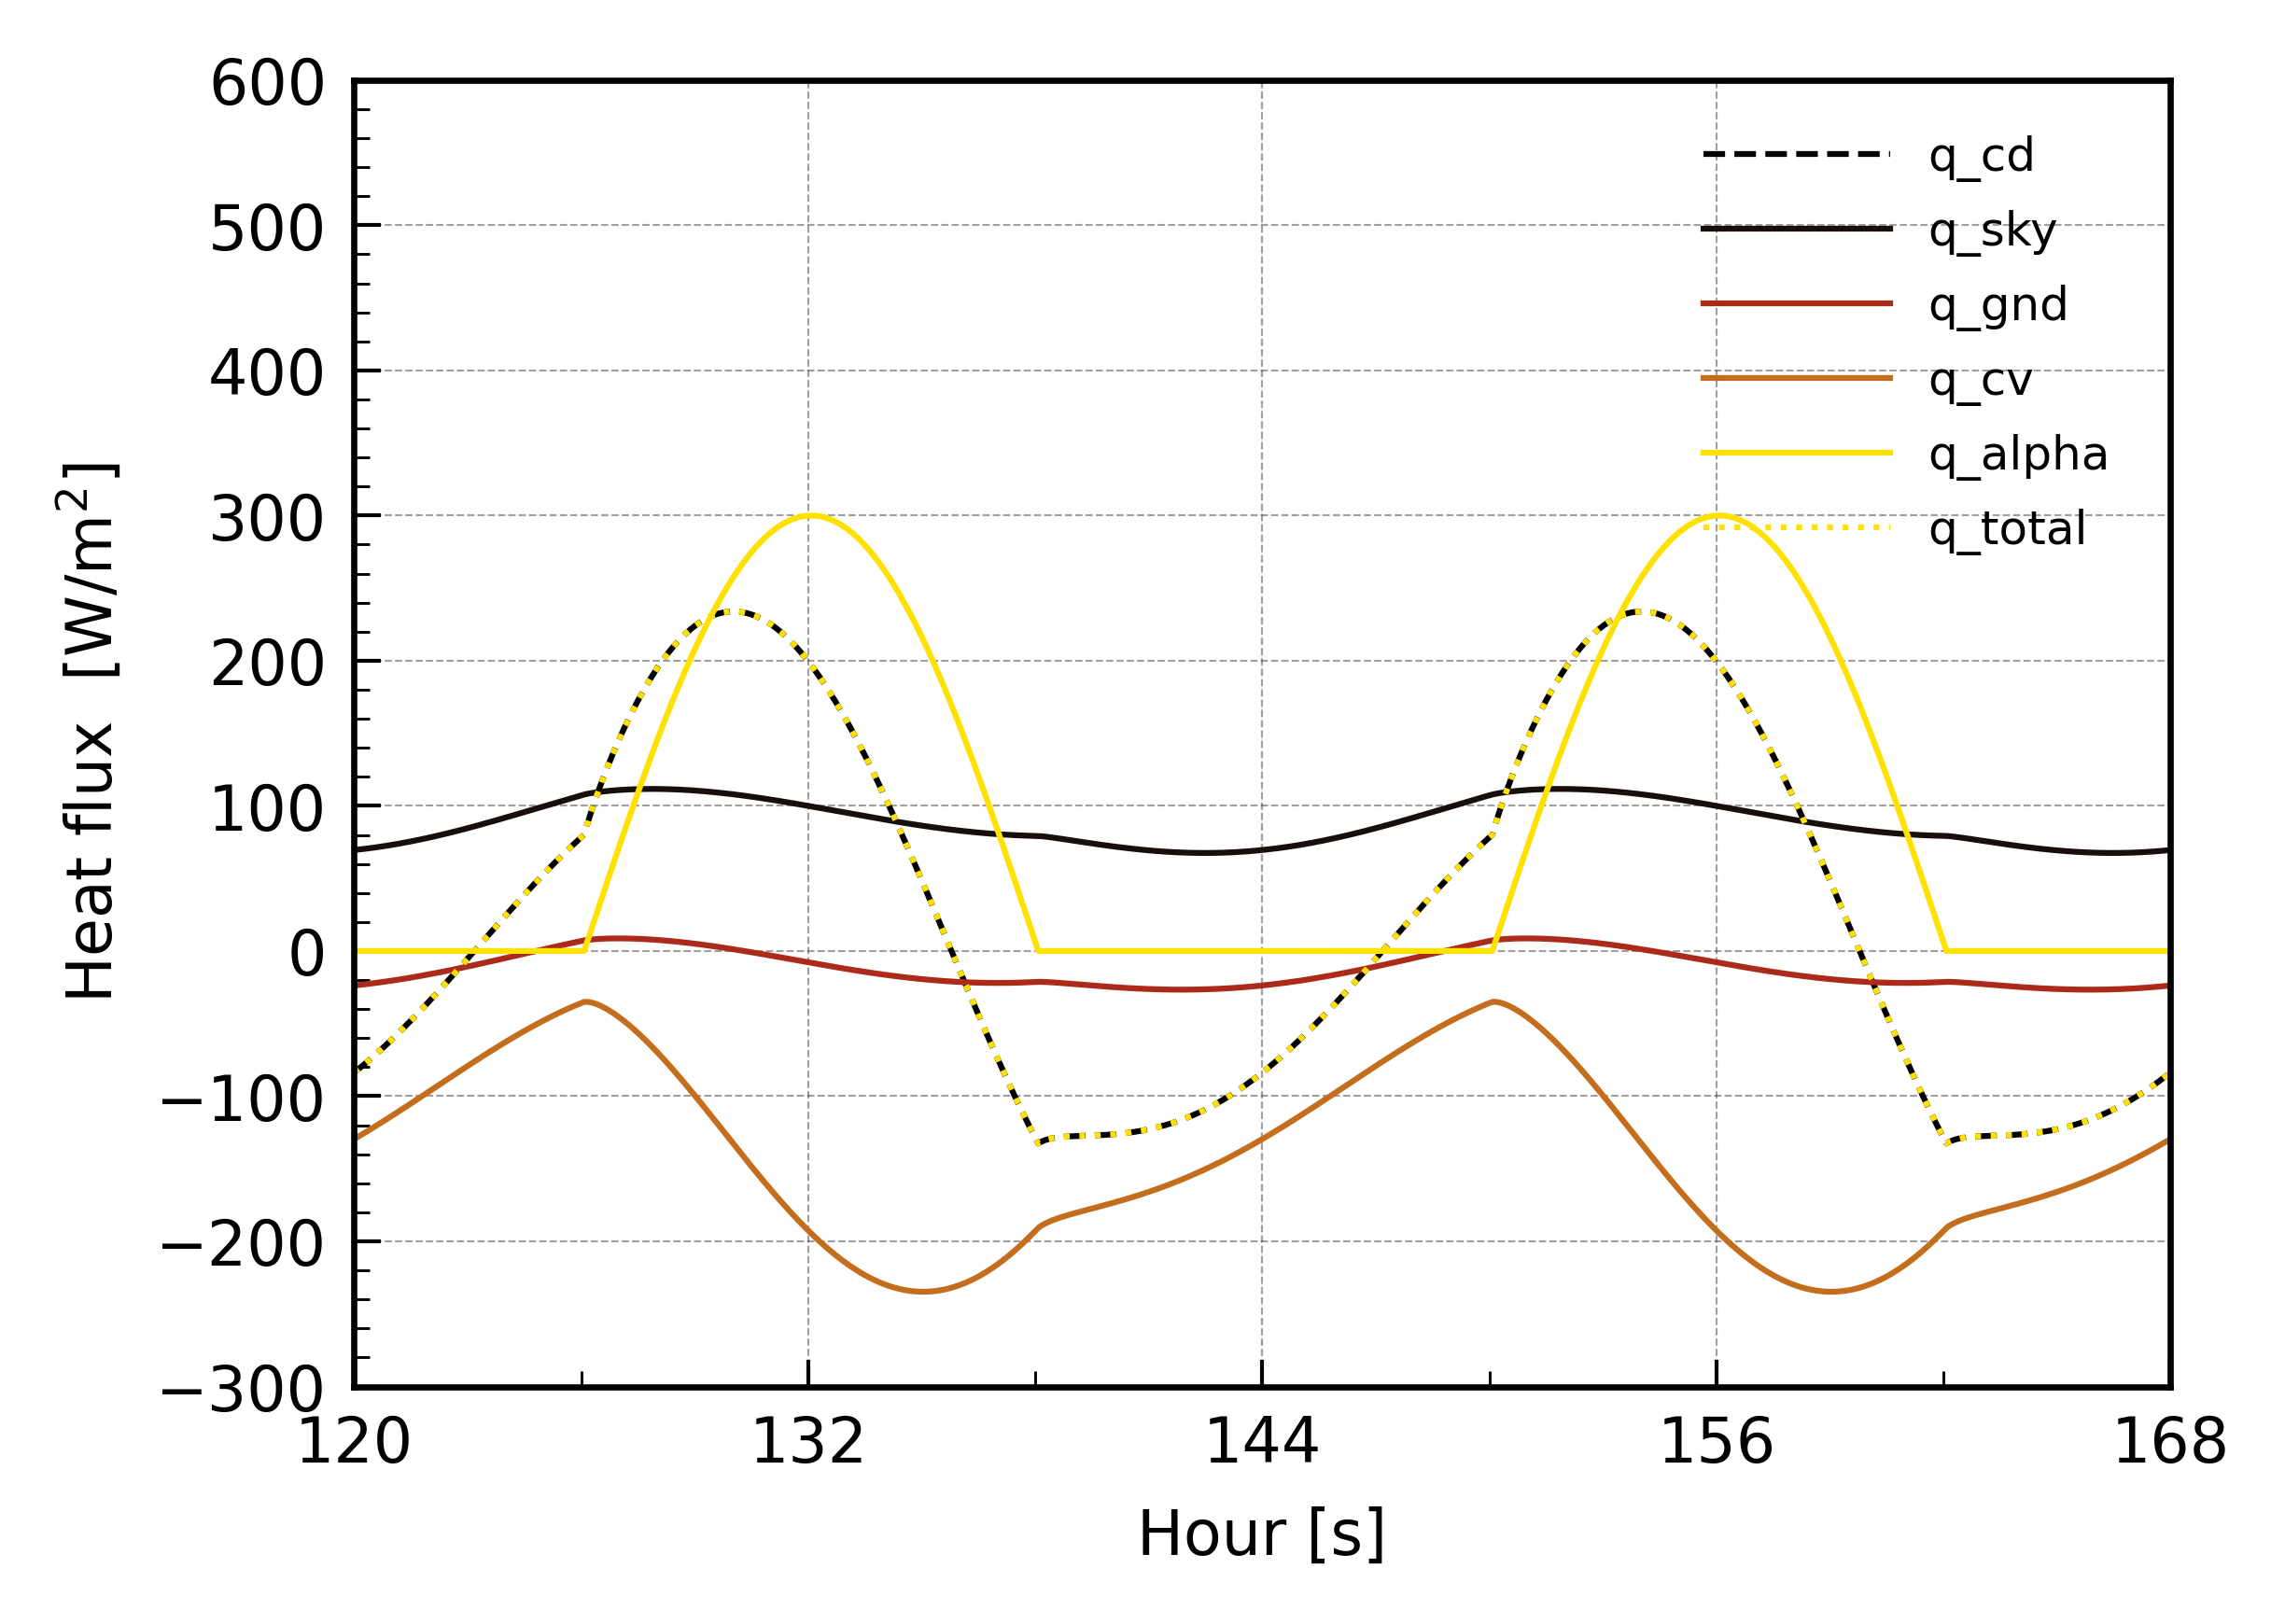

In [14]:
plot(q_cd, q_sky, q_gnd, q_cv, q_alpha, q_t, 6,
     ("q_cd", "q_sky", "q_gnd", "q_cv", "q_alpha", "q_total"))

## Exergy consumption Plot

In [43]:
from cProfile import label

def plot(node1, node2, node3, node4, node5, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1.max().max(), node2.max().max(), node3.max().max(), node4.max().max(), node5.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1.min().min(), node2.min().min(), node3.min().min(), node4.min().min(), node5.min().min())

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1, node2, node3, node4, node5] # 노드 바꾸면 추가해야 됨
    color = ['#180f0d', '#7a1514', '#ac2a1a', '#c46d1c','#ffe100',]
    plot_label = plot_label

    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [Y_min]*nfigs
    ymax = [3]*nfigs
    yint = [0.5]*nfigs
    ymar = [0.085]*nfigs

    xlabel = ["Hour [h]"]*nfigs
    ylabel = ["Exergy consumption $~\mathrm{[W/m^2]}$"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                label = plot_label[i]
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=2, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=6, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.8,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)
    #plt.title("Exergy consumption by conduction inside wall", fontsize=FS)

    plt.savefig('../data/exergy_c.svg', format='svg')

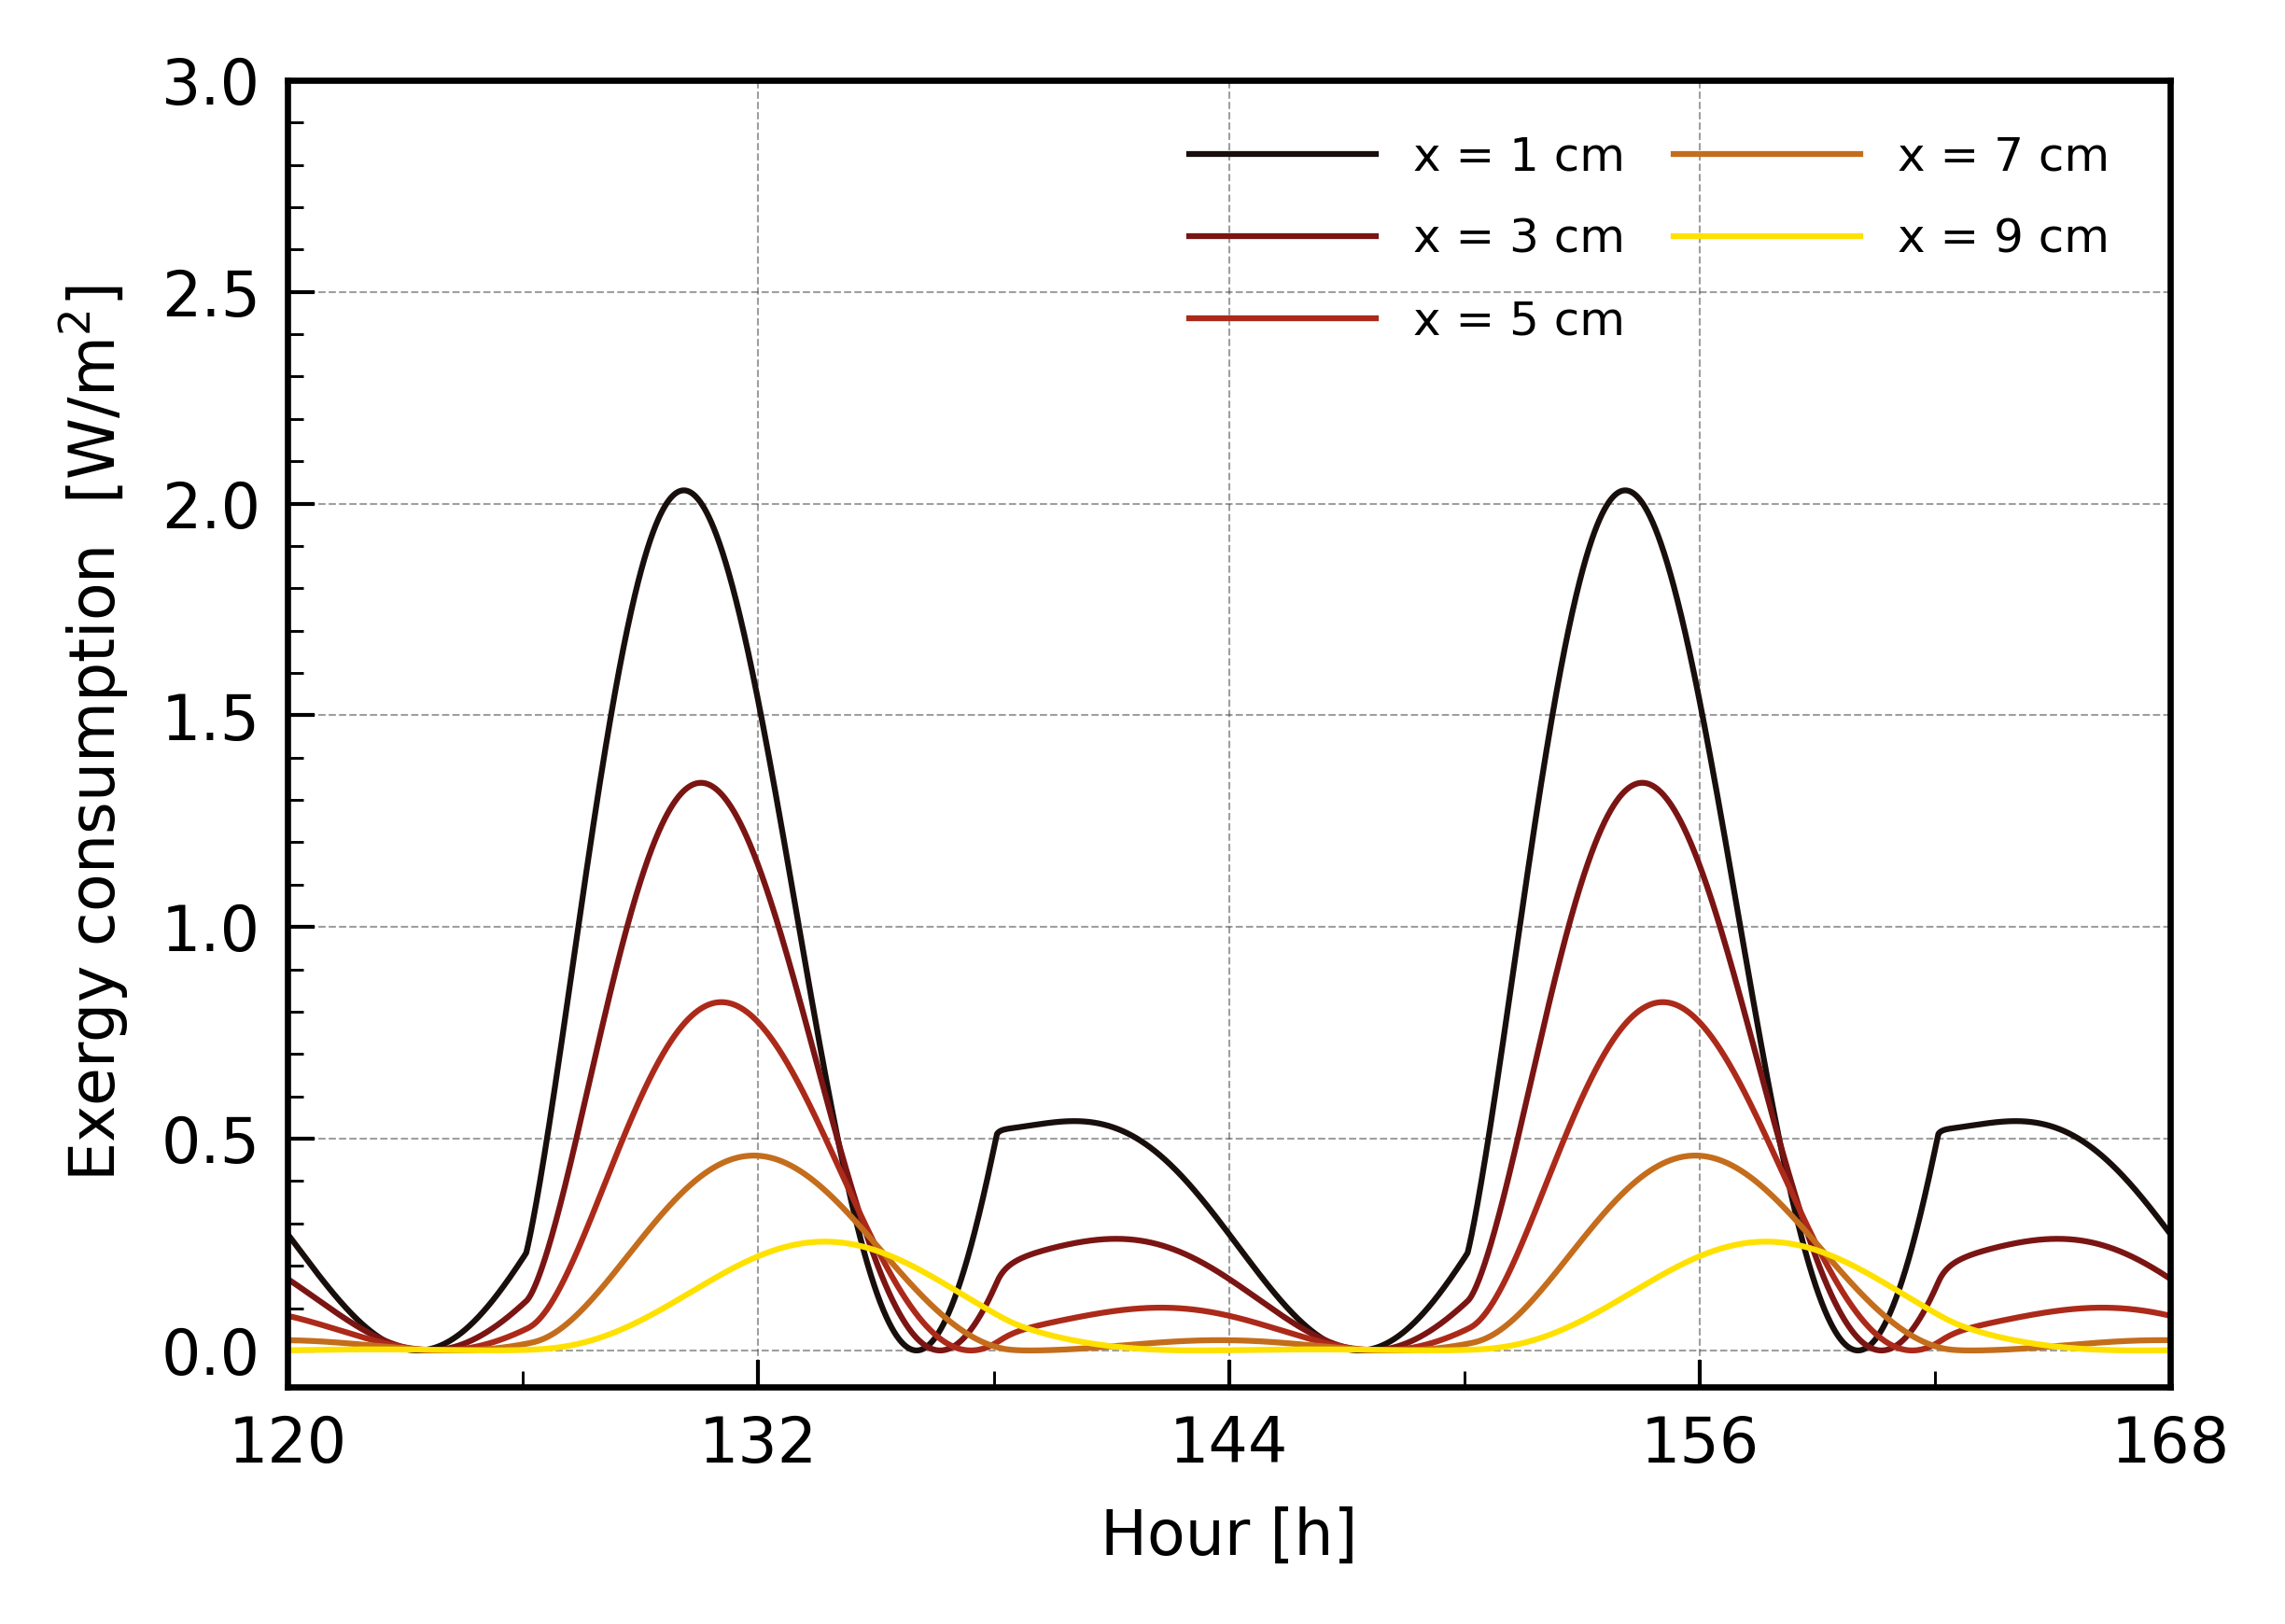

In [44]:
plot(exergy_c_1, exergy_c_3, exergy_c_5, exergy_c_7, exergy_c_9, 5,
     ("x = 1 cm", "x = 3 cm", "x = 5 cm", "x = 7 cm", "x = 9 cm"))

## BL Exergy consumption

In [172]:
from cProfile import label

def plot(node1, node2, node3, node4, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1.max().max(), node2.max().max(), node3.max().max(), node4.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1.min().min(), node2.min().min(), node3.min().min(), node4.min().min())

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1, node2, node3, node4] # 노드 바꾸면 추가해야 됨
    color = ['#FFA41B','#FFD966', '#c46d1c','#F7A4A4',]
    plot_label = plot_label
    LS = ['solid',
          'solid',
        densely_dashed,
        densely_dashdotted,
        densely_dashdotdotted,
        ]

    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [Y_min]*nfigs
    ymax = [350]*nfigs
    yint = [50]*nfigs
    ymar = [10]*nfigs

    xlabel = ["Hour [h]"]*nfigs
    ylabel = ["Exergy consumption $~\mathrm{[W/m^2]}$"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[4],
                label = plot_label[i],
                linestyle = LS[i]
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=2, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=7, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.8,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/exergy_c_BL.svg', format='svg')

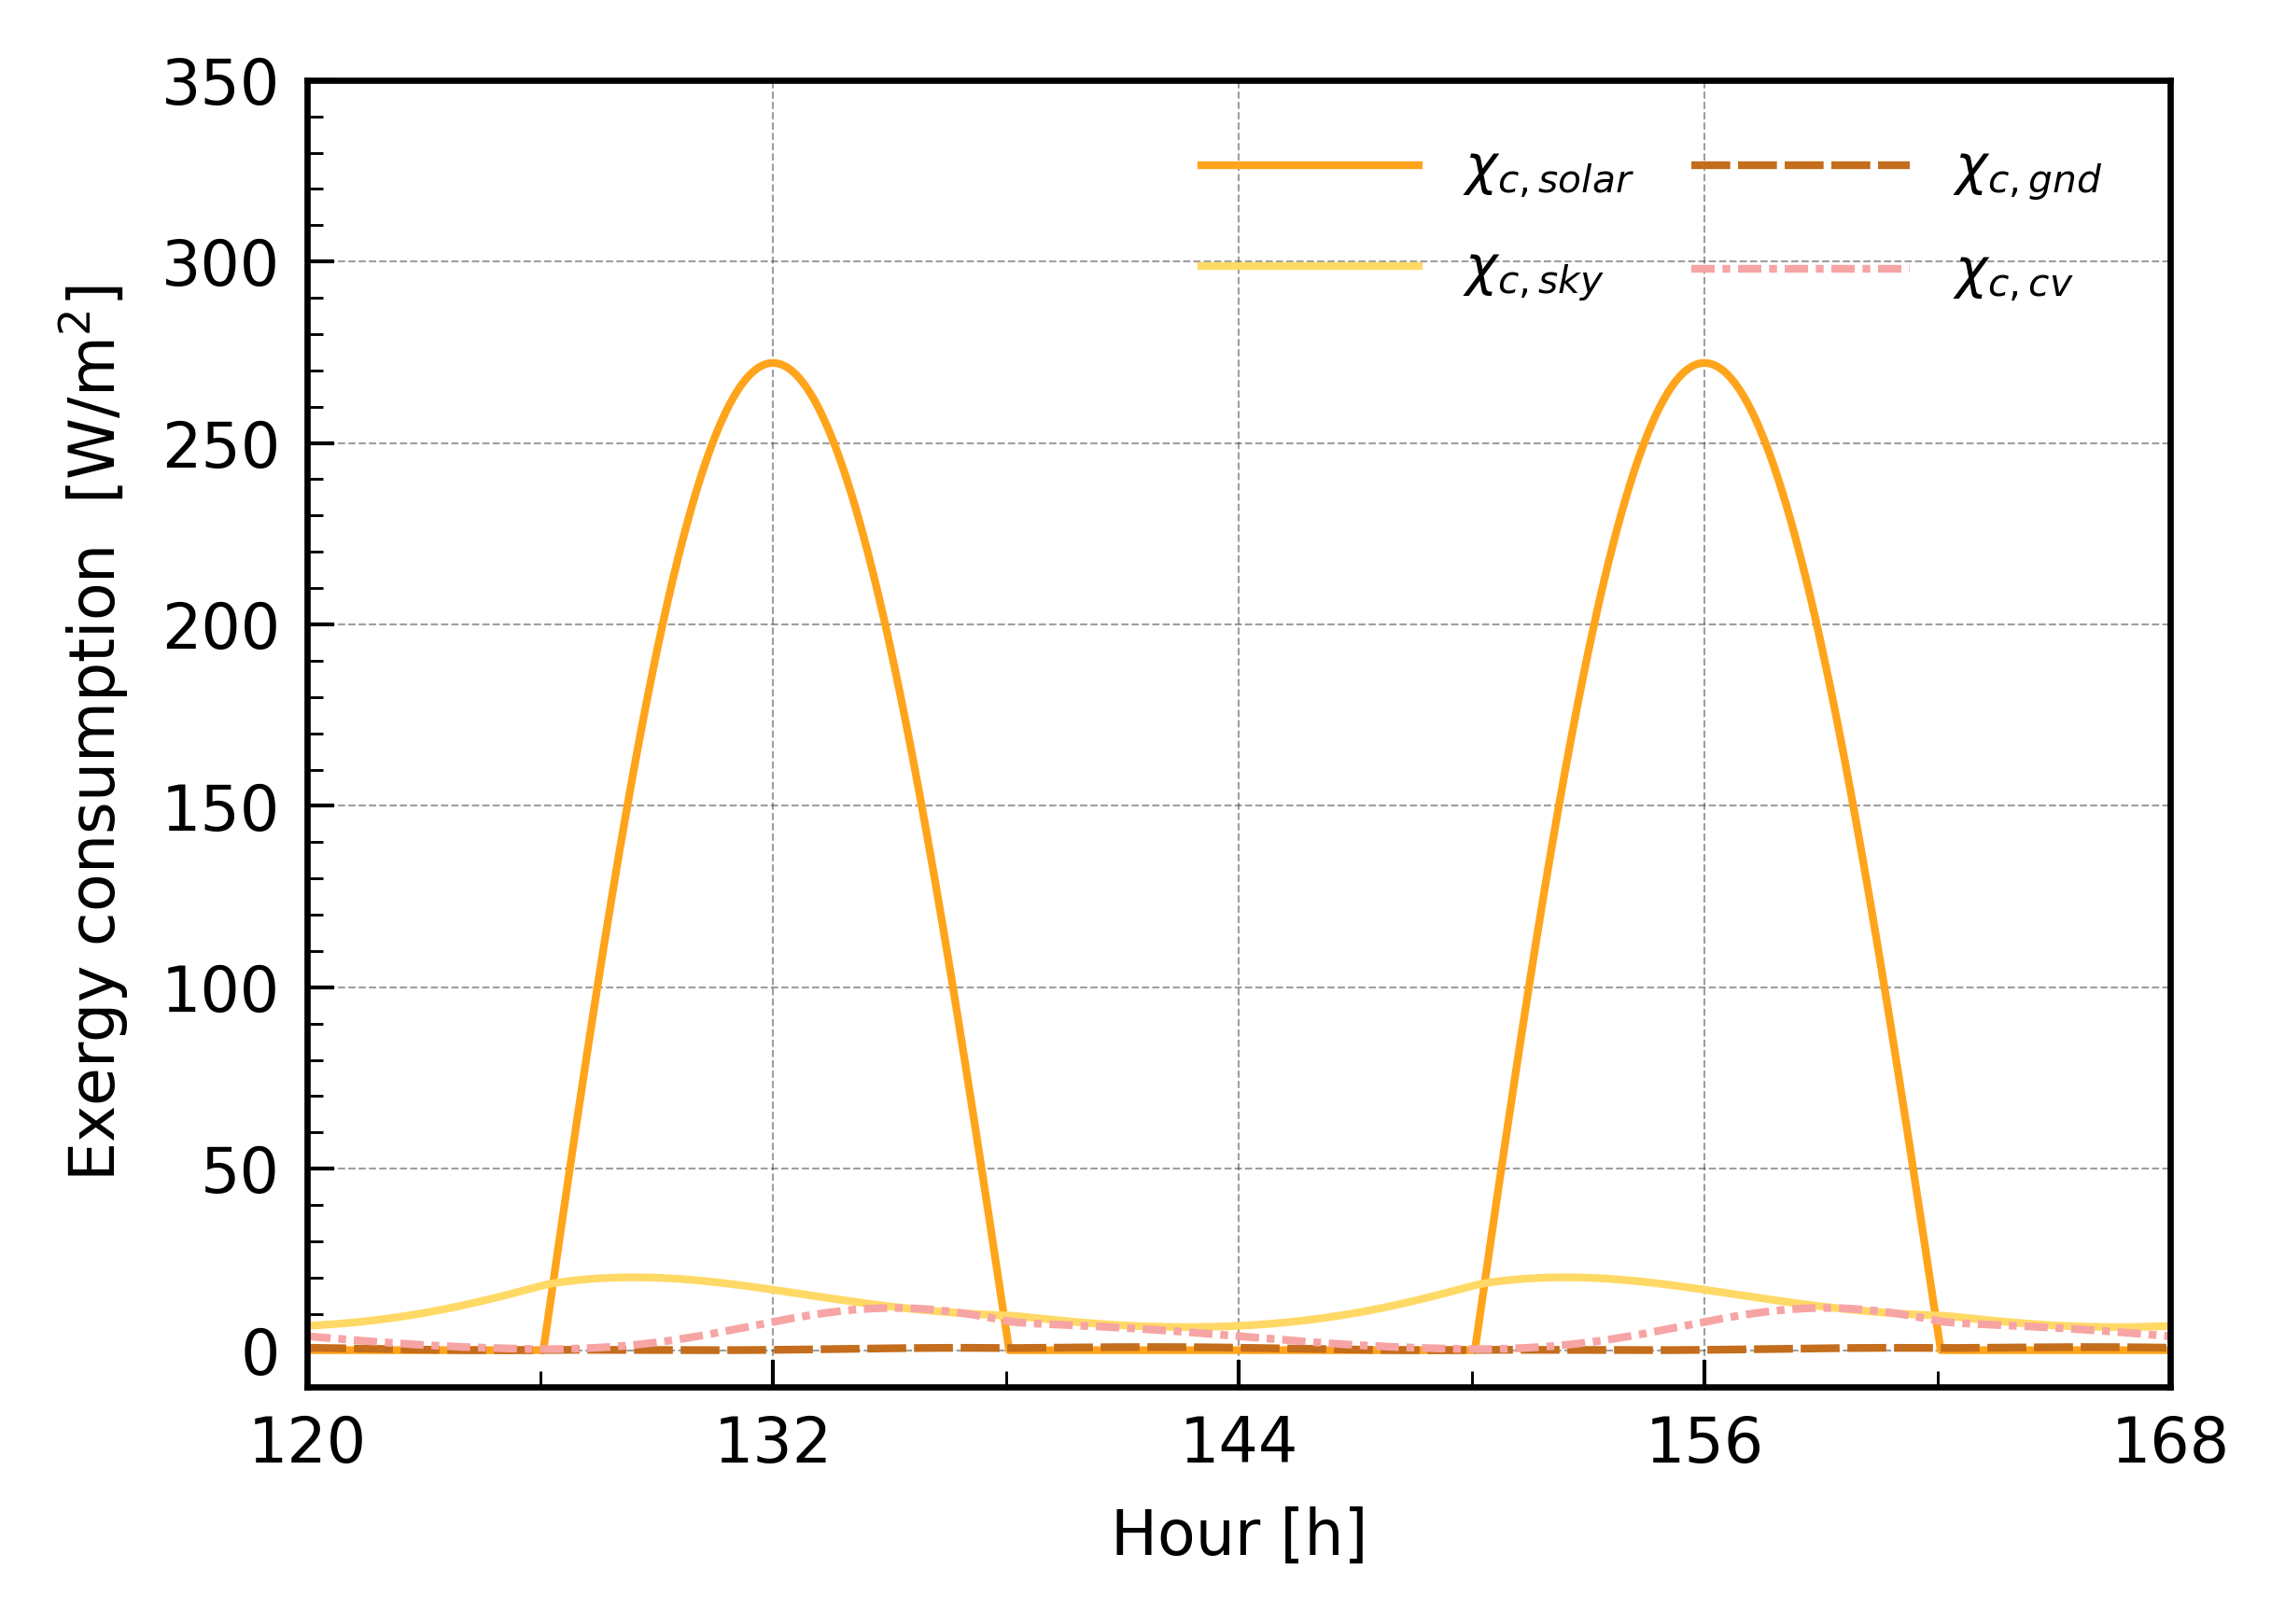

In [173]:
plot(exergy_c_sun, exergy_c_sky, exergy_c_gnd, exergy_c_cv, 4,
     ("${\chi_{c,solar}}$", "${\chi_{c,sky}}$", "${\chi_{c,gnd}}$", "${\chi_{c,cv}}$"))

## 엑서지 소비 적분

In [189]:
from cProfile import label

def barplot(Y, node_count):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi=600,
    )

    X = ("${\chi_{c,solar}}$", "${\chi_{c,sky}}$", "${\chi_{c,gnd}}$", "${\chi_{c,cv}}$")
    x_pos = np.arange(len(X))
    plot_y = Y
    color = ['#FFA41B','#FFD966', '#c46d1c','#F7A4A4']
    width= 0.4
    
    # tick settings

    ymin = [0]*nfigs
    ymax = [60]*nfigs
    yint = [10]*nfigs
    ymar = [0]*nfigs

    ylabel = ["Total Exergy consumption $~\mathrm{[MJ/m^2]}$"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].bar(
                    (x_pos[i]),
                    plot_y.iloc[0, [i]],
                    width= width,
                    color = color[i],
                    align='center'
                    )
                
                ax[ridx, cidx].text(
                    x_pos[i],
                    plot_y.iloc[0, i],
                    f'{plot_y.iloc[0, i]:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=FS
                )

            # # 라벨 설정
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            ax[ridx,cidx].tick_params(axis='x', which='both', bottom=False, top=False)
            
            # 축 위치 설정
            ax[ridx, cidx].set_xticks(x_pos) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx]))
            ax[ridx, cidx].set_xticklabels(X)
            
            # x,y 값 제한 
            ax[ridx, cidx].set_xlim(x_pos[0] - width, x_pos[-1] + width)
            ax[ridx, cidx].set_ylim(ymin[idx] - ymar[idx], ymax[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='y', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=2, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=7, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.8,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k') 
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/total_exergy_c_BL.svg', format='svg')

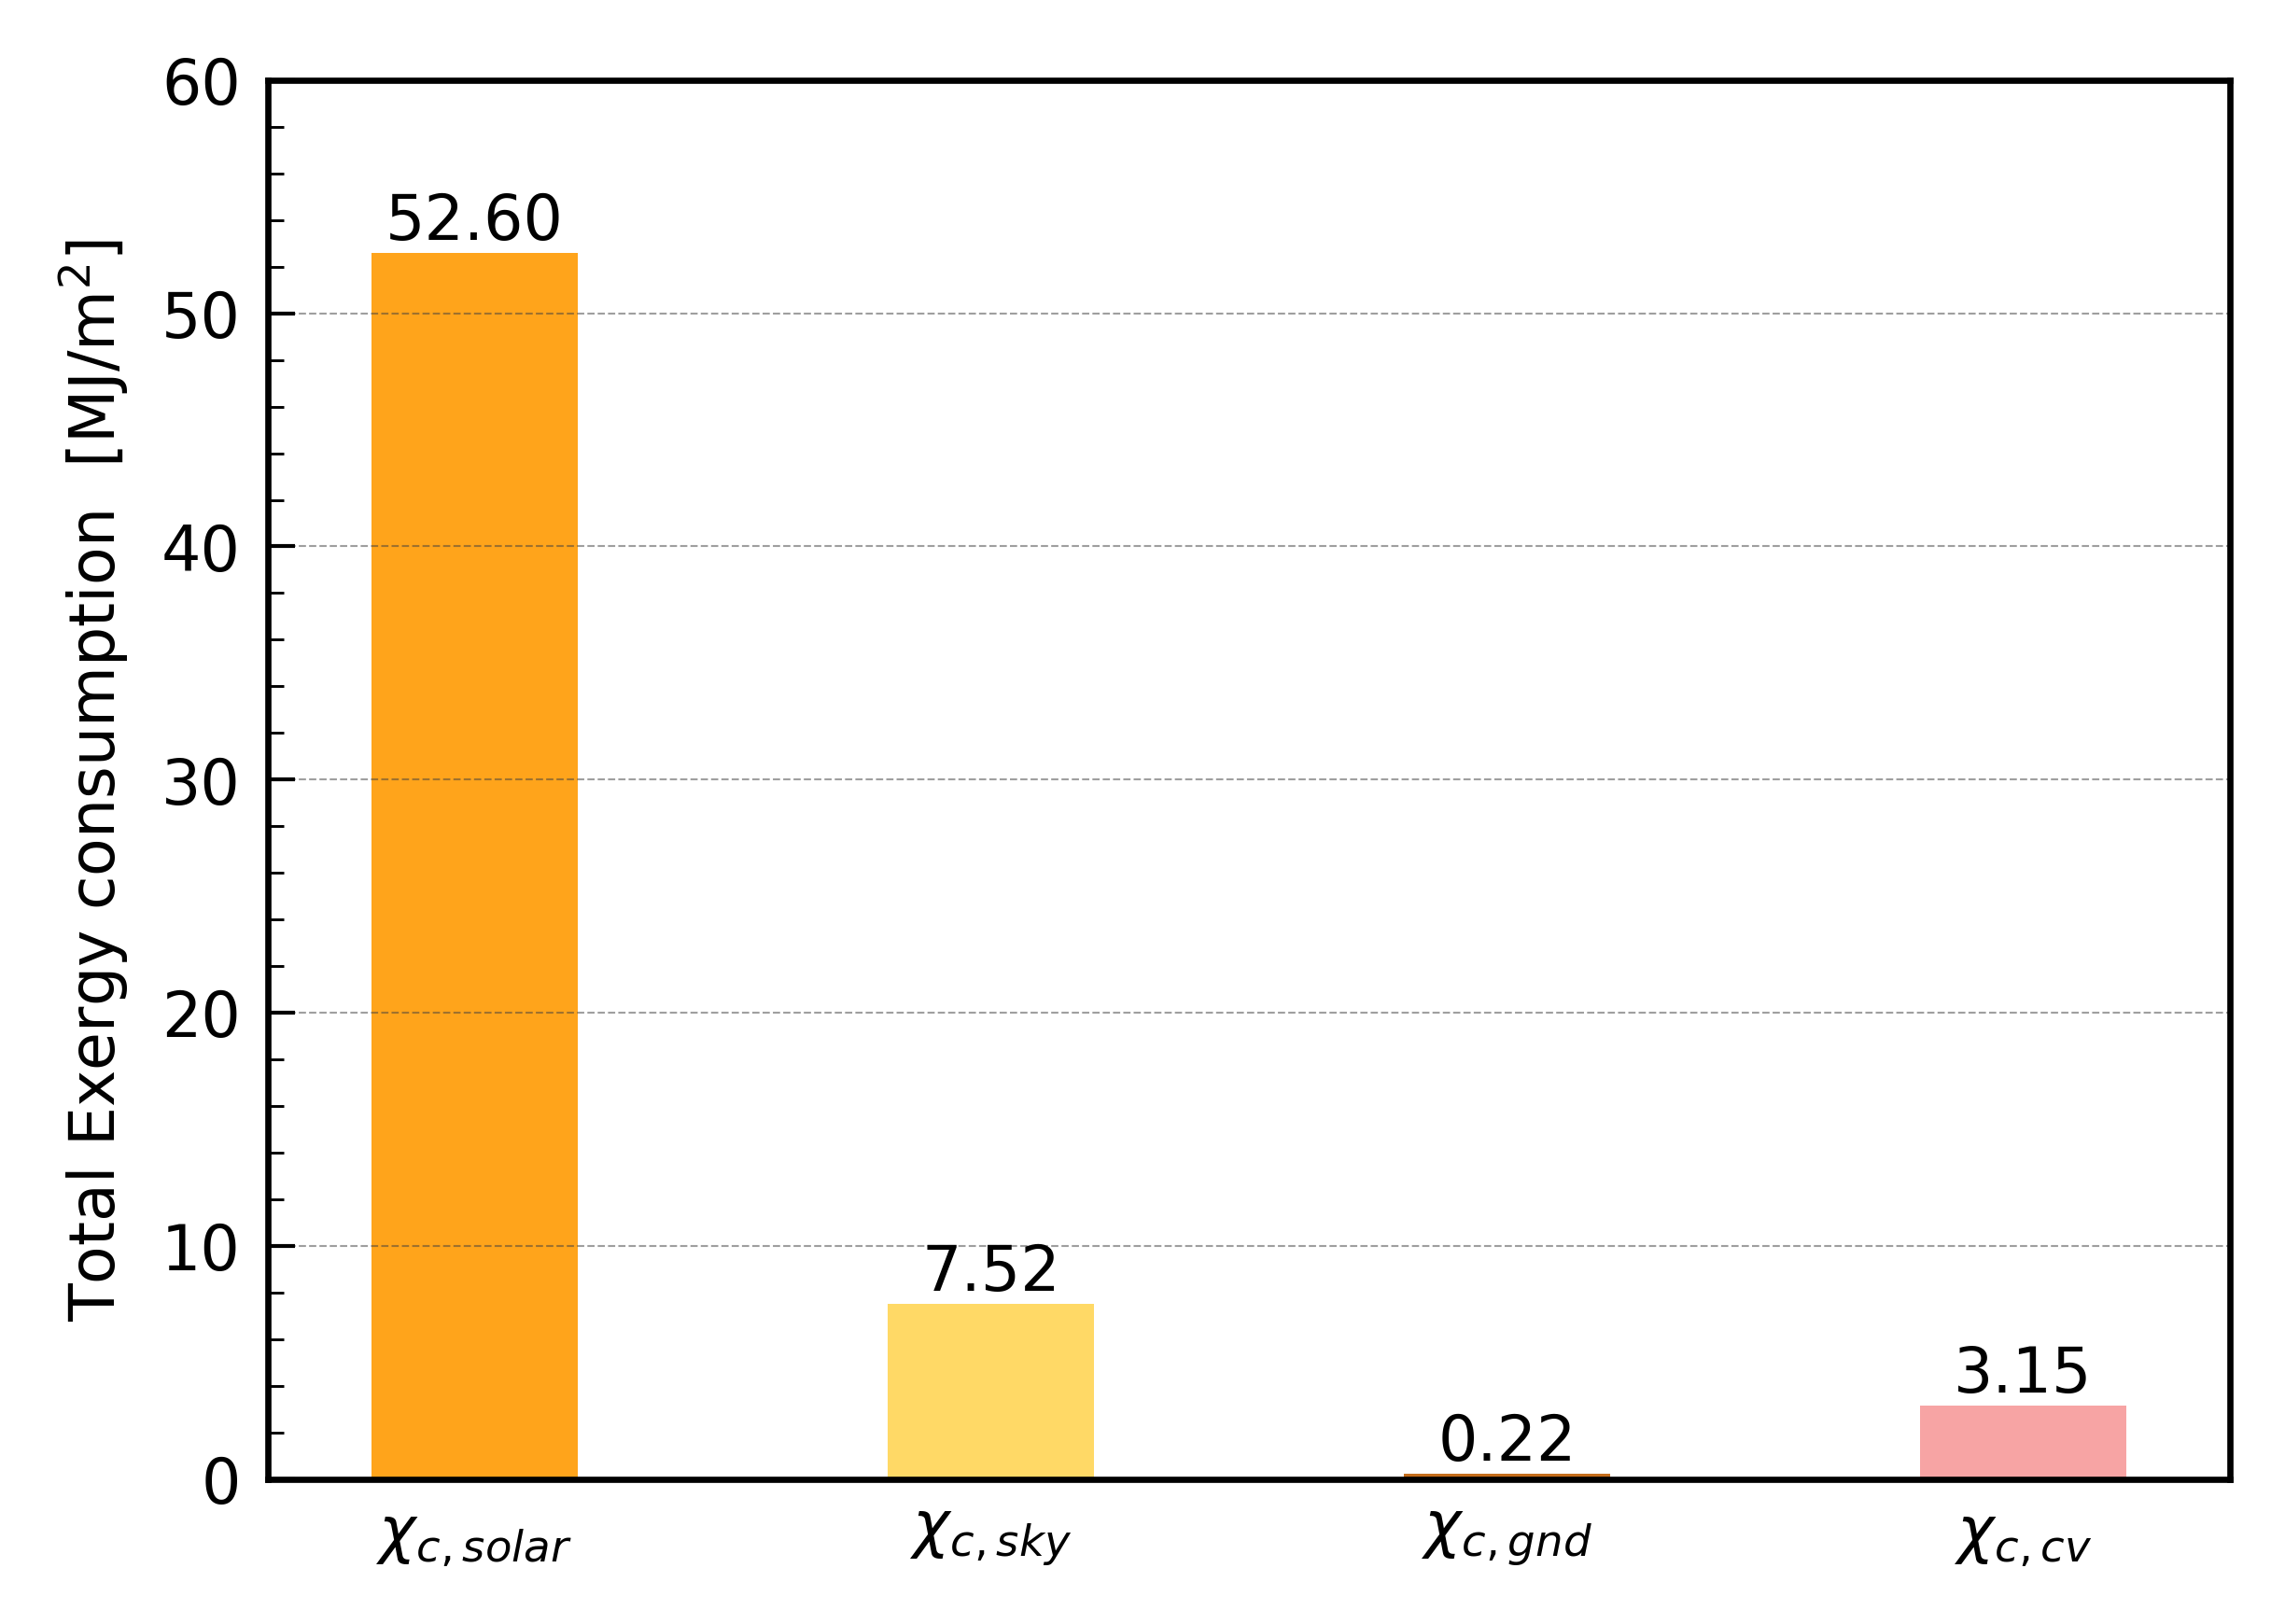

In [190]:
total_exergy_c_BL = df_exergy_c_check.sum().to_frame().transpose()
total_exergy_c_BL = Mega(total_exergy_c_BL)*t

barplot(total_exergy_c_BL, 4)

In [44]:
total_exergy_c_BL

,exergy_c_sun,exergy_c_sky,exergy_c_gnd,exergy_c_cv
0,52598.685365,7521.466736,223.958605,3150.948777


In [193]:
df_total_exergy_c_data = pd.DataFrame(df_exergy_c_data.sum(axis=1), columns=['total'])
df_exergy_c_check


## 누적 Exergy consumption

In [206]:
df_total_exergy_c_data = pd.DataFrame(df_exergy_c_data.sum(axis=1), columns=['total'])

# 특정 시간 이전의 데이터를 0으로 만들기
df_total_exergy_c_data.iloc[:43200, :] = 0
df_exergy_c_check.loc[:, "exergy_c_sun"]
cum_exergy_c_sun = df_exergy_c_check.iloc[:43200, :] = 0
cum_exergy_c_sky = exergy_c_sky.iloc[:43200, :] = 0
cum_exergy_c_gnd = exergy_c_gnd.iloc[:43200, :] = 0
cum_exergy_c_cv = exergy_c_cv.iloc[:43200, :] = 0

cum_list = [df_total_exergy_c_data, cum_exergy_c_sun, cum_exergy_c_sky, cum_exergy_c_gnd, cum_exergy_c_cv]
combined_cumsum_data = pd.concat(cum_list, axis=1)
cumsum_data = np.cumsum(combined_cumsum_data)
cumsum_data = cumsum_data.astype(float)

total_exergy_c = Mega((cumsum_data.iloc[:,[0]])*t)

plt.plot(df_total_exergy_c_data)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [204]:
from cProfile import label

def plot(node1, node_count):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = max(node1) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = min(node1)

    # decimal index 소숫점 제거해주기 
    d_idx = 10

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(10),cm2in(7)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1] # 노드 바꾸면 추가해야 됨
    color = ['#180f0d', '#7a1514', '#ac2a1a', '#c46d1c','#ffe100',]

    # tick settings 
    xmin = [120]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/14]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [0]*nfigs
    ymax = [1]*nfigs
    yint = [0.1]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [s]"]*nfigs
    ylabel = ["Exergy consumption $~\mathrm{[MJ/m^2]}$"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=1, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=6, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.8,
                                handlelength= 4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.8)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

    plt.savefig('../data/Cumulative exergy consumption.svg', format='svg')

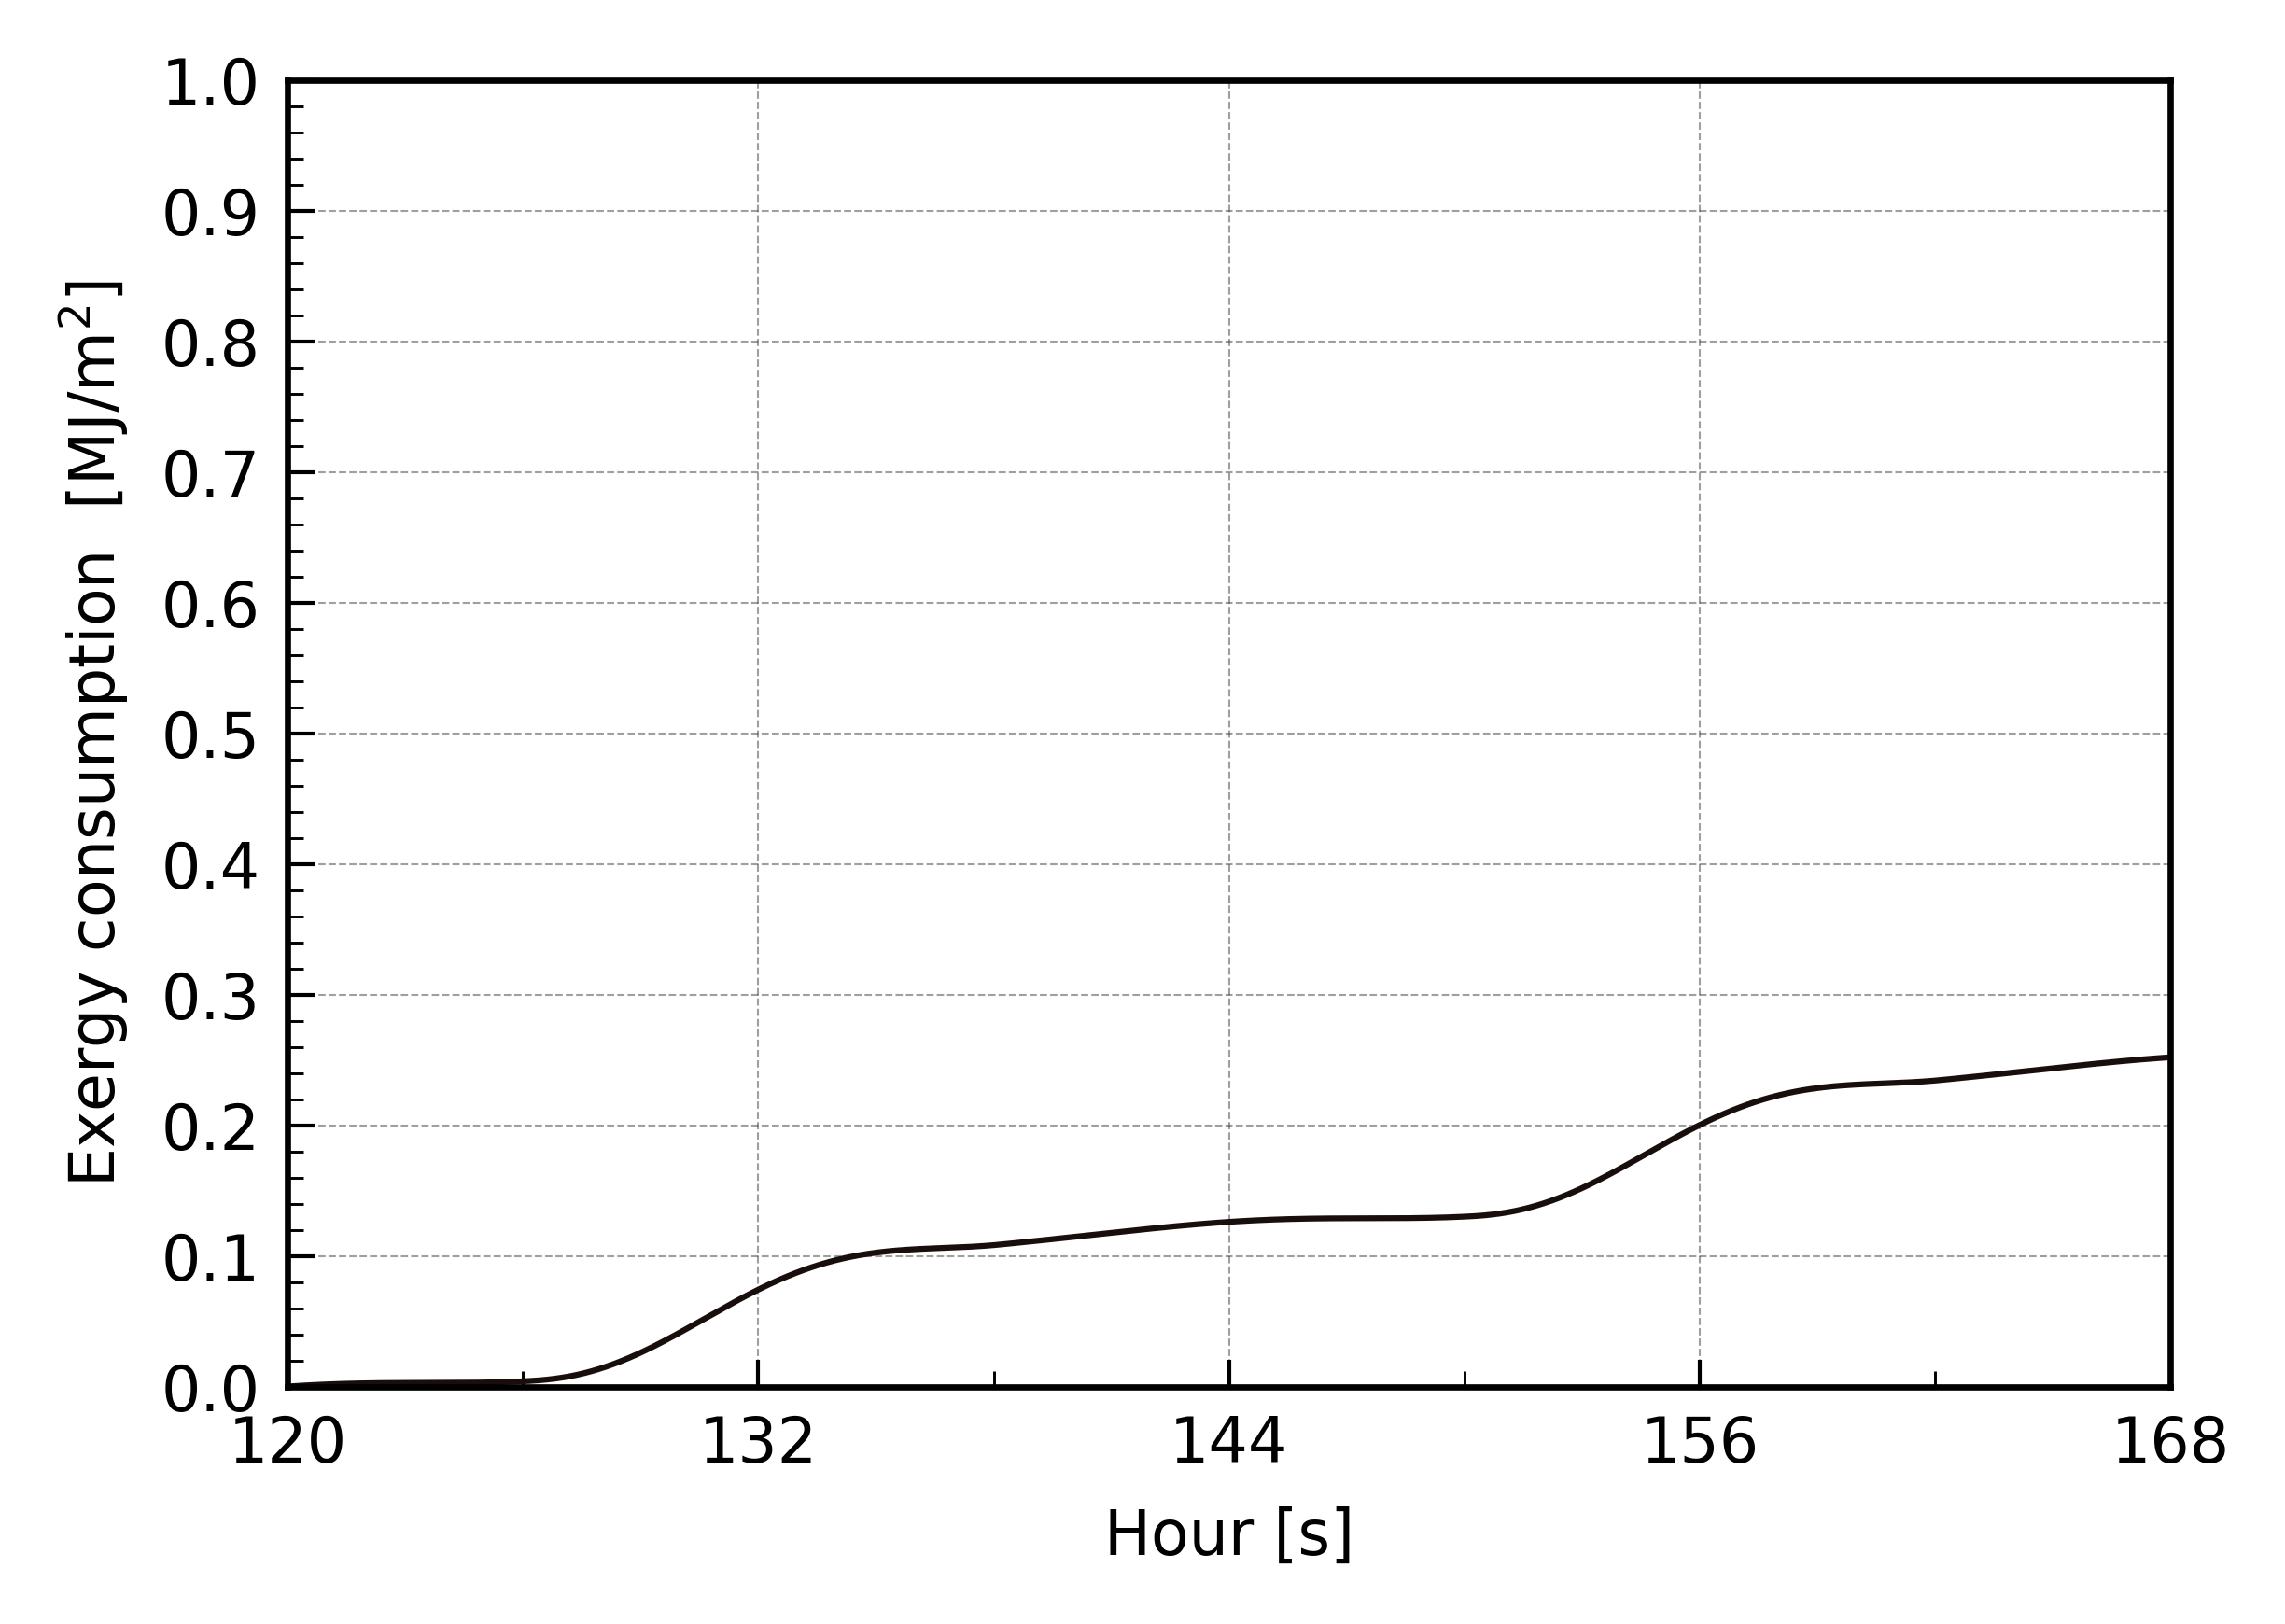

In [205]:
plot(total_exergy_c, 1)